<a href="https://colab.research.google.com/github/ankushparulekar1224/Lunion/blob/master/notebook29961f3736.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import os
import wave
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from IPython.display import Audio

import librosa
import librosa.display

# Remove the import statement for np_utils
# from keras.utils import np_utils

# Modify the import statement for concatenate
from tensorflow.keras.layers import concatenate

from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv1D, Conv2D, SeparableConv1D, MaxPooling1D, MaxPooling2D
from tensorflow.keras.layers import Input, add, Flatten, Dense, BatchNormalization, Dropout, LSTM, GRU
from tensorflow.keras.layers import GlobalMaxPooling1D, GlobalMaxPooling2D, Activation, LeakyReLU, ReLU
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import cohen_kappa_score,roc_auc_score,confusion_matrix,classification_report

# Replace usage of np_utils with to_categorical or other equivalent functions
# For example:
# np_utils.to_categorical(y, num_classes)

# Modify to:
# tf.keras.utils.to_categorical(y, num_classes)

# Or if you are using to_categorical from numpy:
# np.eye(num_classes)[y]


In [3]:
pip install keras

In [11]:
audio_data = '/content/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files'

In [12]:
import pandas as pd

# Specify the path to the CSV file
csv_file_path = '/content/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv'

# Read the CSV file into a DataFrame, specifying column names
patient_data = pd.read_csv(csv_file_path, names=['pid', 'disease'])


In [13]:
diagnosis_df = pd.read_csv('/content/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv', names=['patient_id', 'disease'])
diagnosis_df.head(4)

,patient_id,disease
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD


In [14]:
print (diagnosis_df.disease.value_counts())
print ('')
print (diagnosis_df.disease.value_counts(normalize=True) *100)

COPD              64
Healthy           26
URTI              14
Bronchiectasis     7
Pneumonia          6
Bronchiolitis      6
LRTI               2
Asthma             1
Name: disease, dtype: int64

COPD              50.793651
Healthy           20.634921
URTI              11.111111
Bronchiectasis     5.555556
Pneumonia          4.761905
Bronchiolitis      4.761905
LRTI               1.587302
Asthma             0.793651
Name: disease, dtype: float64


(array([ 0., 10., 20., 30., 40., 50., 60., 70.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70')])

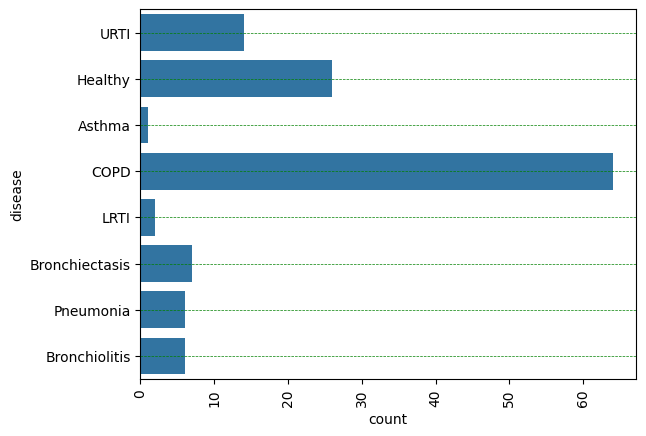

In [15]:
sns.countplot(diagnosis_df.disease)
plt.grid(axis = 'y',color = 'green', linestyle = '--', linewidth = 0.5)
plt.xticks(rotation=90)

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:

!kaggle datasets download -d vbookshelf/respiratory-sound-database

100% 3.68G/3.69G [00:37<00:00, 150MB/s]
100% 3.69G/3.69G [00:37<00:00, 105MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/respiratory-sound-database.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [16]:
path='/content/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files'
files=[s.split('.')[0] for s in os.listdir(path) if '.txt' in s]

In [18]:
files[:10]

['186_3b3_Pl_mc_AKGC417L',
 '162_2b3_Ar_mc_AKGC417L',
 '178_1b3_Ar_mc_AKGC417L',
 '200_2p4_Pl_mc_AKGC417L',
 '163_8b3_Ar_mc_AKGC417L',
 '178_1b2_Pl_mc_AKGC417L',
 '162_2b3_Al_mc_AKGC417L',
 '179_1b1_Al_sc_Meditron',
 '135_2b1_Ar_mc_LittC2SE',
 '158_1p4_Al_mc_AKGC417L']

In [17]:
import librosa
import numpy as np

def add_noise(data, x):
    noise = np.random.randn(len(data))
    data_noise = data + x * noise
    return data_noise

def shift(data, x):
    return np.roll(data, x)

def stretch(data, rate):
    stretched_data = librosa.effects.time_stretch(data, rate)
    return stretched_data

def pitch_shift(data, rate):
    shifted_data = librosa.effects.pitch_shift(data, sr=22050, n_steps=rate)
    return shifted_data


In [19]:
import librosa
import numpy as np

def stretch(data, rate):
    # Stretching using phase vocoder
    stretched_data = librosa.effects.time_stretch(data, rate=rate)
    return stretched_data


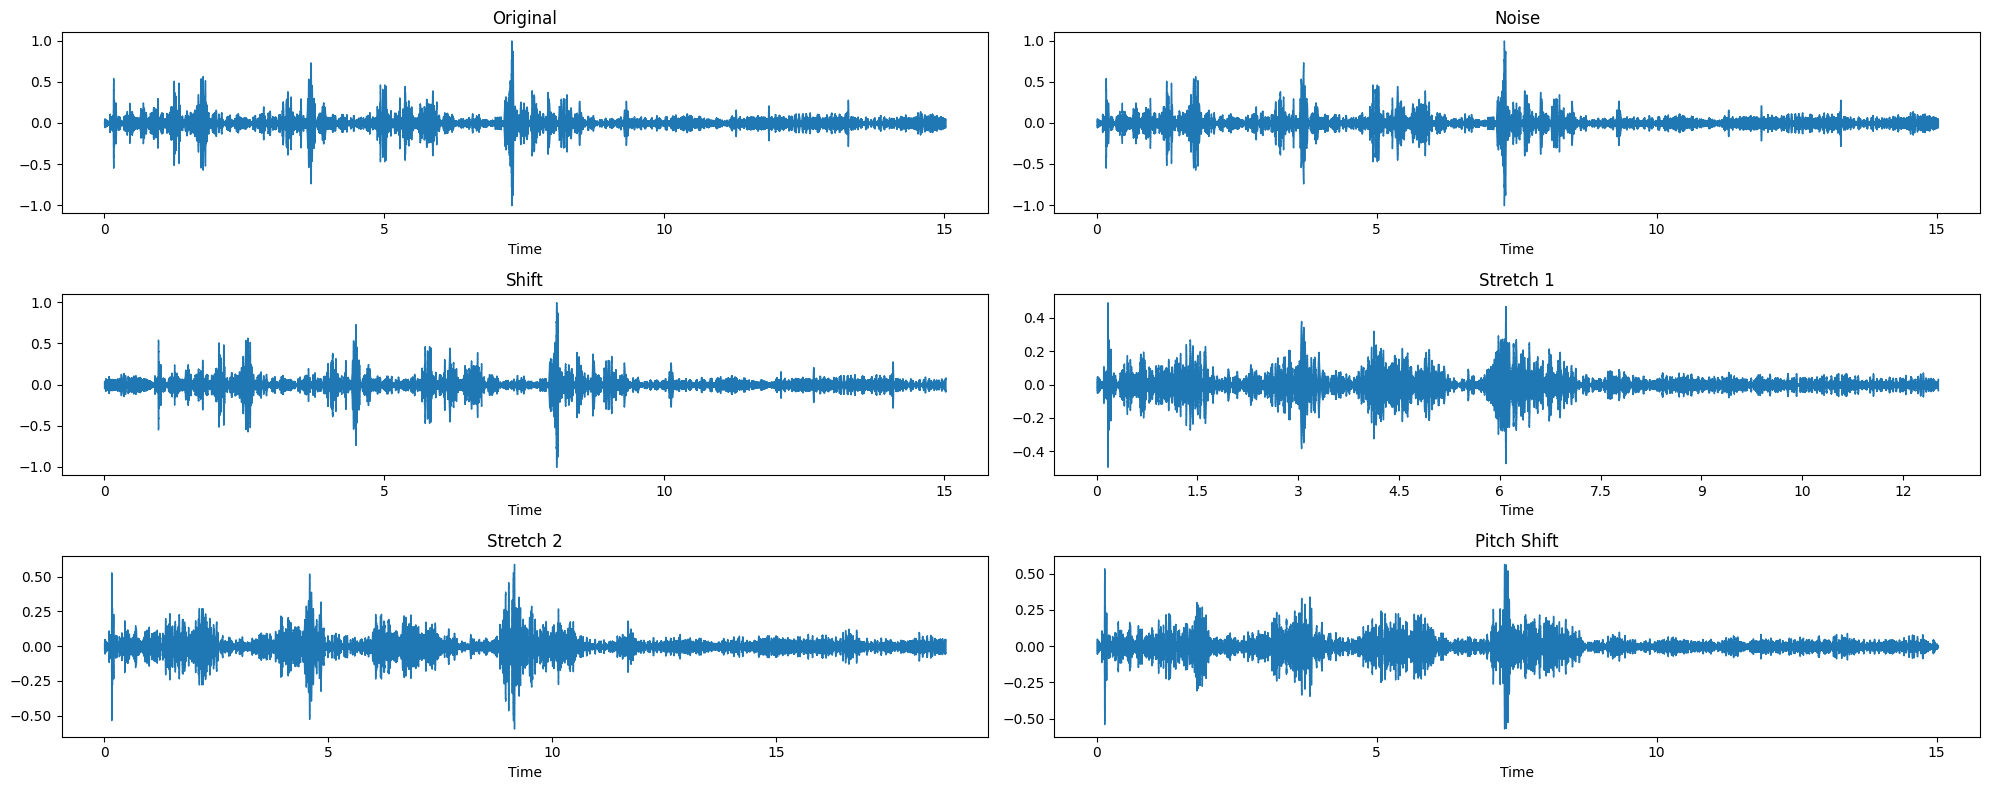

In [20]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

def add_noise(data, x):
    noise = np.random.randn(len(data))
    data_noise = data + x * noise
    return data_noise

def shift(data, x):
    return np.roll(data, x)

def stretch(data, rate):
    # Stretching using phase vocoder
    stretched_data = librosa.effects.time_stretch(data, rate=rate)
    return stretched_data

def pitch_shift(data, rate):
    shifted_data = librosa.effects.pitch_shift(data, sr=22050, n_steps=rate)
    return shifted_data

def show_audio(audio_path):
    y, sr = librosa.load(audio_path, sr=None)  # Specify sr=None to keep the original sampling rate
    y_noise = add_noise(y, 0.0008)
    y_shift = shift(y, 3200)
    y_stretch_1 = stretch(y, 1.2)
    y_stretch_2 = stretch(y, 0.8)
    y_pitch_shift = pitch_shift(y, 3)

    plt.figure(figsize=(20, 8))

    plt.subplot(3, 2, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title('Original')

    plt.subplot(3, 2, 2)
    librosa.display.waveshow(y_noise, sr=sr)
    plt.title('Noise')

    plt.subplot(3, 2, 3)
    librosa.display.waveshow(y_shift, sr=sr)
    plt.title('Shift')

    plt.subplot(3, 2, 4)
    librosa.display.waveshow(y_stretch_1, sr=sr)
    plt.title('Stretch 1')

    plt.subplot(3, 2, 5)
    librosa.display.waveshow(y_stretch_2, sr=sr)
    plt.title('Stretch 2')

    plt.subplot(3, 2, 6)
    librosa.display.waveshow(y_pitch_shift, sr=sr)
    plt.title('Pitch Shift')

    plt.tight_layout()
    plt.show()

show_audio('/content/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/104_1b1_Lr_sc_Litt3200.wav')


In [21]:
def show_audio_features(audio_path):
    y, sr = librosa.load(audio_path)
    y_noise = add_noise(y , 0.0008)
    y_shift = shift(y,3200)
    y_stretch_1 = stretch(y, 1.2)
    y_stretch_2 = stretch(y, 0.8)
    y_pitch_shift = pitch_shift(y, 3)

    y = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=50)
    y_noise = librosa.feature.mfcc(y=y_noise, sr=sr, n_mfcc=50)
    y_shift = librosa.feature.mfcc(y=y_shift, sr=sr, n_mfcc=50)
    y_stretch_1 = librosa.feature.mfcc(y=y_stretch_1, sr=sr, n_mfcc=50)
    y_stretch_2 = librosa.feature.mfcc(y=y_stretch_2, sr=sr, n_mfcc=50)
    y_pitch_shift = librosa.feature.mfcc(y=y_pitch_shift, sr=sr, n_mfcc=50)

    plt.figure(figsize=(20, 8))

    plt.subplot(3,2,1)
    librosa.display.specshow(librosa.power_to_db(y,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('orginal')

    plt.subplot(3,2,2)
    librosa.display.specshow(librosa.power_to_db(y_noise,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('noise')

    plt.subplot(3,2,3)
    librosa.display.specshow(librosa.power_to_db(y_shift,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('shift')

    plt.subplot(3,2,4)
    librosa.display.specshow(librosa.power_to_db(y_stretch_1,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('stretch 1')

    plt.subplot(3,2,5)
    librosa.display.specshow(librosa.power_to_db(y_stretch_2,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('stretch 2')

    plt.subplot(3,2,6)
    librosa.display.specshow(librosa.power_to_db(y_pitch_shift,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('pitch shift')



    plt.tight_layout()

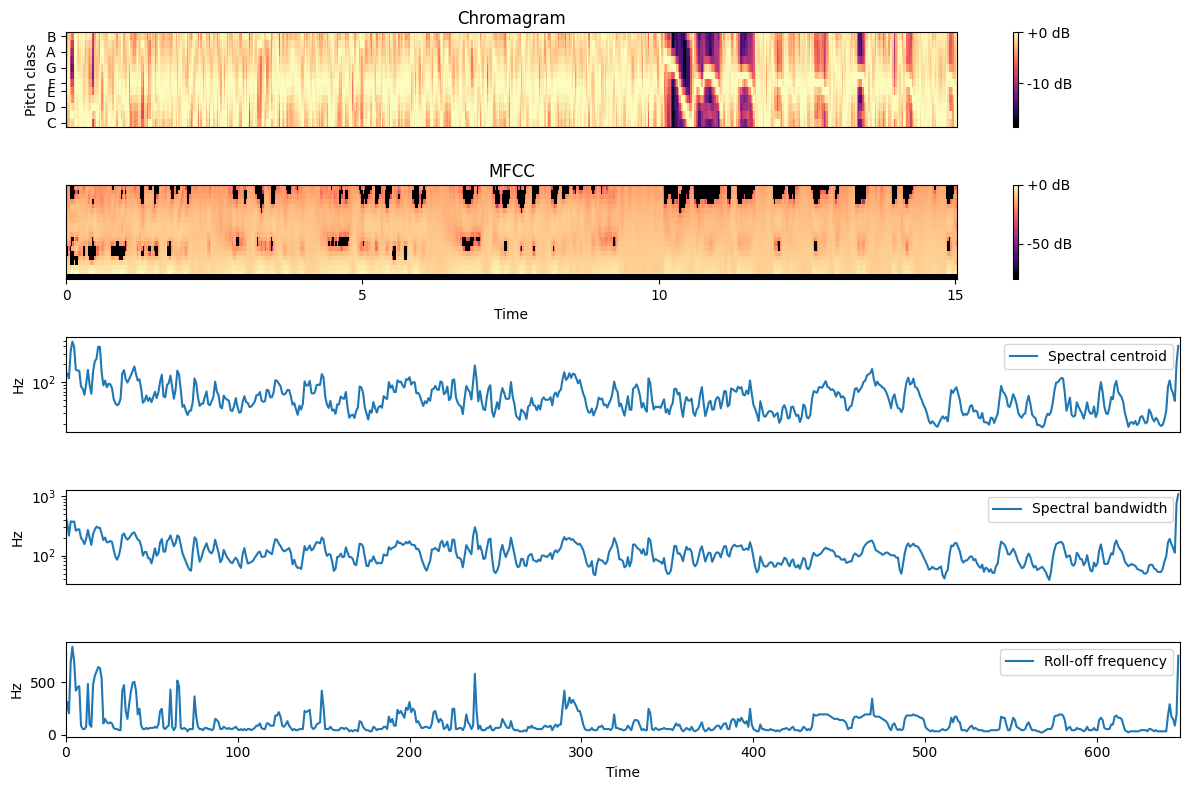

In [22]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

def show_audio_features(file_path):
    # Load the audio file
    y, sr = librosa.load(file_path)

    # Extract features
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)

    # Plot features
    plt.figure(figsize=(12, 8))

    plt.subplot(5, 1, 1)
    librosa.display.specshow(librosa.power_to_db(chroma, ref=np.max), y_axis='chroma')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Chromagram')

    plt.subplot(5, 1, 2)
    librosa.display.specshow(librosa.power_to_db(mfccs, ref=np.max), x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('MFCC')

    plt.subplot(5, 1, 3)
    plt.semilogy(spec_cent.T, label='Spectral centroid')
    plt.ylabel('Hz')
    plt.xticks([])
    plt.xlim([0, spec_cent.shape[-1]])
    plt.legend()

    plt.subplot(5, 1, 4)
    plt.semilogy(spec_bw.T, label='Spectral bandwidth')
    plt.ylabel('Hz')
    plt.xticks([])
    plt.xlim([0, spec_bw.shape[-1]])
    plt.legend()

    plt.subplot(5, 1, 5)
    plt.plot(rolloff.T, label='Roll-off frequency')
    plt.ylabel('Hz')
    plt.xlabel('Time')
    plt.xlim([0, rolloff.shape[-1]])
    plt.legend()

    plt.tight_layout()
    plt.show()

# Now you can call the show_audio_features function with the file path
show_audio_features('/content/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/104_1b1_Lr_sc_Litt3200.wav')


In [31]:
import os
import librosa
import numpy as np

def mfccs_feature_extraction(dir_):
    X_ = []
    y_ = []

    COPD = []
    copd_count = 0

    data = diagnosis_df
    features = 52

    for soundDir in os.listdir(dir_):
        if soundDir.endswith('.wav') and soundDir[:3] not in ['103', '108', '115']:
            try:
                data_x, sampling_rate = librosa.load(os.path.join(dir_, soundDir), res_type='kaiser_fast')
                mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T,axis=0)
                p = list(data[data['patient_id'] == int(soundDir[:3])]['disease'])[0]

                if p == 'COPD':
                    if soundDir[:6] in COPD and copd_count < 2:
                        COPD.append(soundDir[:6])
                        copd_count += 1
                        X_.append(mfccs)
                        y_.append(p)
                    elif soundDir[:6] not in COPD:
                        COPD.append(soundDir[:6])
                        copd_count = 0
                        X_.append(mfccs)
                        y_.append(p)

                elif p in ['Bronchiectasis', 'Bronchiolitis']:
                    X_.append(mfccs)
                    y_.append('Bronchiolitis')

                    data_noise = add_noise(data_x, 0.001)
                    mfccs_noise = np.mean(librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_noise)
                    y_.append('Bronchiolitis')

                    data_shift = shift(data_x, 1600)
                    mfccs_shift = np.mean(librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_shift)
                    y_.append('Bronchiolitis')

                    data_stretch = stretch(data_x, 1.2)
                    mfccs_stretch = np.mean(librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_stretch)
                    y_.append('Bronchiolitis')

                    data_stretch_2 = stretch(data_x, 0.8)
                    mfccs_stretch_2 = np.mean(librosa.feature.mfcc(y=data_stretch_2, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_stretch_2)
                    y_.append('Bronchiolitis')

                    data_pitch_shift = pitch_shift(data_x, 3)
                    mfccs_pitch_shift = np.mean(librosa.feature.mfcc(y=data_pitch_shift, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_pitch_shift)
                    y_.append('Bronchiolitis')

                else:
                    X_.append(mfccs)
                    y_.append(p)

                    data_noise = add_noise(data_x, 0.001)
                    mfccs_noise = np.mean(librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_noise)
                    y_.append(p)

                    data_shift = shift(data_x, 1600)
                    mfccs_shift = np.mean(librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_shift)
                    y_.append(p)

                    data_stretch = stretch(data_x, 1.2)
                    mfccs_stretch = np.mean(librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_stretch)
                    y_.append(p)

                    data_stretch_2 = stretch(data_x, 0.8)
                    mfccs_stretch_2 = np.mean(librosa.feature.mfcc(y=data_stretch_2, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_stretch_2)
                    y_.append(p)

                    data_pitch_shift = pitch_shift(data_x, 3)
                    mfccs_pitch_shift = np.mean(librosa.feature.mfcc(y=data_pitch_shift, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_pitch_shift)
                    y_.append(p)

            except Exception as e:
                print(f"Error processing file {soundDir}: {e}")
                continue  # Continue to the next iteration

    X_data = np.array(X_)
    y_data = np.array(y_)

    return X_data, y_data


In [30]:
x_mfccs, y = mfccs_feature_exteraction(audio_data)

<ipython-input-23-f774bd52c311>:37: UserWarning: PySoundFile failed. Trying audioread instead.
  data_x, sampling_rate = librosa.load(dir_+soundDir,res_type='kaiser_fast')


FileNotFoundError: [Errno 2] No such file or directory: '/content/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files160_1b2_Al_mc_AKGC417L.wav'

In [60]:
def augmented_lables_count(lables):
    unique, counts = np.unique(lables, return_counts=True)
    data_count = dict(zip(unique, counts))

    data = data_count

    courses = list(data.keys())
    values = list(data.values())

    fig = plt.figure(figsize = (10, 5))

    # creating the bar plot
    plt.bar(courses, values, color =['orange','green','blue','red','yellow','black'],
            width = 0.4)

    plt.xlabel("Diseases")
    plt.ylabel("Count")
    plt.title("Count of each disease")
    plt.show()

    print (data_count)

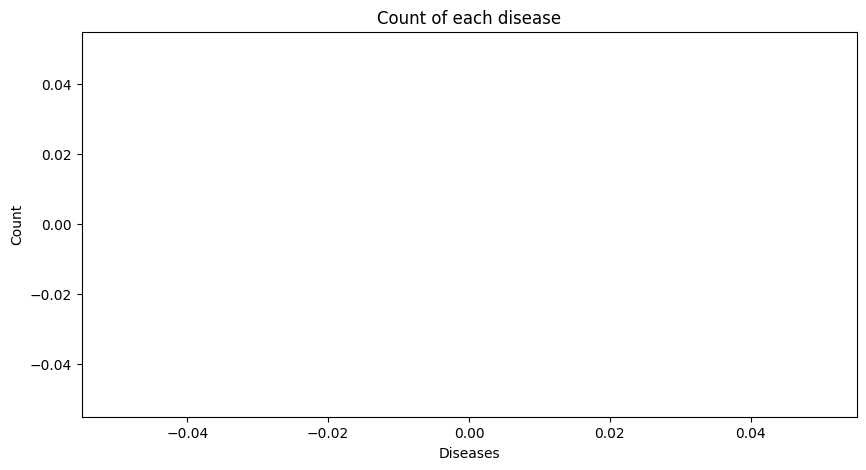

{}


In [61]:
augmented_lables_count(y)

In [ ]:
y_data_encode = y.reshape(y.shape[0],1)
y_data_encode = np.where(y_data_encode == 'COPD',np.array([1,0,0,0,0]).reshape(1,5) , y_data_encode)
y_data_encode = np.where(y_data_encode == 'Bronchiolitis',np.array([0,1,0,0,0]).reshape(1,5) , y_data_encode)
y_data_encode = np.where(y_data_encode == 'Pneumonia',np.array([0,0,1,0,0]).reshape(1,5) , y_data_encode)
y_data_encode = np.where(y_data_encode == 'URTI',np.array([0,0,0,1,0]).reshape(1,5) , y_data_encode)
y_data_encode = np.where(y_data_encode == 'Healthy',np.array([0,0,0,0,1]).reshape(1,5) , y_data_encode)

Y_data = y_data_encode.astype('float64')

In [ ]:
mfccs_features = np.array(x_mfccs)
lables = np.array(Y_data)

mfccs_features.shape , lables.shape

In [ ]:
mfcc_train, mfcc_val, lables_train, lables_val  = train_test_split(mfccs_features, lables, test_size=0.175, random_state=10)
mfcc_train, mfcc_test, lables_train, lables_test = train_test_split(mfcc_train, lables_train, test_size=0.075, random_state=10)

print (mfcc_train.shape, mfcc_val.shape, mfcc_test.shape)
print (lables_train.shape, lables_val.shape, lables_test.shape)

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
#   plt.plot(epochs, loss, label='training_loss')
#   plt.plot(epochs, val_loss, label='val_loss')
#   plt.title('Loss')
#   plt.xlabel('Epochs')
#   plt.legend()
#   plt.grid()


  # Plot accuracy
  plt.figure()
  plt.grid()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


In [ ]:
x_train_gru = np.expand_dims(mfcc_train,axis=1)
x_val_gru = np.expand_dims(mfcc_val,axis=1)
x_test_gru = np.expand_dims(mfcc_test,axis=1)

y_train_gru = np.expand_dims(lables_train,axis=1)
y_val_gru = np.expand_dims(lables_val,axis=1)
y_test_gru = np.expand_dims(lables_test,axis=1)

In [ ]:
Input_Sample = Input(shape=(1,52))

model_conv = Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu')(Input_Sample)
model_conv = MaxPooling1D(pool_size=2, strides = 2, padding = 'same')(model_conv)
model_conv = BatchNormalization()(model_conv)

model_conv = Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu')(model_conv)
model_conv = MaxPooling1D(pool_size=2, strides = 2, padding = 'same')(model_conv)
model_conv = BatchNormalization()(model_conv)

model_2_1 = GRU(32,return_sequences=True,activation='tanh',go_backwards=True)(model_conv)
model_2 = GRU(128,return_sequences=True, activation='tanh',go_backwards=True)(model_2_1)

model_3 = GRU(64,return_sequences=True,activation='tanh',go_backwards=True)(model_conv)
model_3 = GRU(128,return_sequences=True, activation='tanh',go_backwards=True)(model_3)

model_x = GRU(64,return_sequences=True,activation='tanh',go_backwards=True)(model_conv)
model_x = GRU(128,return_sequences=True, activation='tanh',go_backwards=True)(model_x)

model_add_1 = add([model_3,model_2,model_x])

model_5 = GRU(128,return_sequences=True,activation='tanh',go_backwards=True)(model_add_1)
model_5 = GRU(32,return_sequences=True, activation='tanh',go_backwards=True)(model_5)

model_6 = GRU(64,return_sequences=True,activation='tanh',go_backwards=True)(model_add_1)
model_6 = GRU(32,return_sequences=True, activation='tanh',go_backwards=True)(model_6)

model_add_2 = add([model_5,model_6,model_2_1])


model_7 = Dense(32, activation=None)(model_add_2)
model_7 = LeakyReLU()(model_7)
model_7 = Dense(128, activation=None)(model_7)
model_7 = LeakyReLU()(model_7)

model_9 = Dense(64, activation=None)(model_add_2)
model_9 = LeakyReLU()(model_9)
model_9 = Dense(128, activation=None)(model_9)
model_9 = LeakyReLU()(model_9)

model_add_3 = add([model_7,model_9])

model_10 = Dense(64, activation=None)(model_add_3)
model_10 = LeakyReLU()(model_10)

model_10 = Dense(32, activation=None)(model_10)
model_10 = LeakyReLU()(model_10)

model_10 = Dense(5, activation="softmax")(model_10)

gru_model = Model(inputs=Input_Sample, outputs = model_10)

gru_model.summary()

In [ ]:
tf.keras.utils.plot_model(gru_model, "gru_model.png", show_shapes=True)

In [ ]:
optimiser = tf.keras.optimizers.Adam(learning_rate = 0.0001)
gru_model.compile(optimizer=optimiser, loss='categorical_crossentropy',metrics=['accuracy'])

cb = [EarlyStopping(patience=300,monitor='accuracy',mode='max',restore_best_weights=True),
      ModelCheckpoint("/kaggle/working/diagnosis_GRU_CNN_1.h5",save_best_only=True)]

In [ ]:
history = gru_model.fit(x_train_gru, y_train_gru, batch_size=8, epochs=50, validation_data=(x_val_gru, y_val_gru), callbacks = cb)

In [ ]:
gru_model.evaluate(x_train_gru, y_train_gru)

plot_loss_curves(history)

In [ ]:
classes = ["COPD" ,"Bronchiolitis ", "Pneumoina", "URTI", "Healthy"]

preds = gru_model.predict(x_test_gru)
classpreds = [np.argmax(t) for t in preds ]
y_testclass = [np.argmax(t) for t in y_test_gru]
cm = confusion_matrix(y_testclass, classpreds)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', xticklabels=classes, yticklabels=classes)

plt.title('')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

In [ ]:
print(classification_report(y_testclass, classpreds, target_names=classes))

In [ ]:
def gru_diagnosis_prediction(test_audio):
    data_x, sampling_rate = librosa.load(test_audio)
    data_x = stretch (data_x,1.2)

    features = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=52).T,axis = 0)

    features = features.reshape(1,52)

    test_pred = gru_model.predict(np.expand_dims(features, axis = 1))
    classpreds = classes[np.argmax(test_pred[0], axis=1)[0]]
    confidence = test_pred.T[test_pred[0].mean(axis=0).argmax()].mean()

    print (classpreds , confidence)

In [ ]:
val=[]
dir_= '/kaggle/input/respiratory-test/107_2b5_Ar_mc_AKGC417L.wav'
features = 52

soundDir = ''#'/kaggle/input/respiratory-test'
data_x, sampling_rate = librosa.load(dir_+soundDir,res_type='kaiser_fast')
mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T,axis=0)
val.append(mfccs)
val = np.expand_dims(val,axis=1)

In [ ]:
classes[np.argmax(gru_model.predict(val))]